In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import linregress

nba_df= pd.read_csv("Resources/shot_logs.csv")


In [309]:
nba_df

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [310]:
#id unique shooters, and count
nba_shooter= nba_df['player_name'].unique()
print(len(nba_shooter))
name_check= nba_df['CLOSEST_DEFENDER_PLAYER_ID'].unique()
print(len(name_check))

grouped_def_df=nba_df.groupby("CLOSEST_DEFENDER_PLAYER_ID")
#convert all NaN in Shot_clock category to game_clock
#drop columns
cleaned_df= nba_df.drop(columns=["MATCHUP", "LOCATION", "DRIBBLES", "TOUCH_TIME"])
cleaned_df

281
474


,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,W,24,3,1,0:00,NaN,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,L,-16,7,4,11:10,23.0,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [311]:
#convert all NaN in Shot_clock category to game_clock

In [312]:
#rename player_name and player_id to fit all caps style
cleaned_df.rename(columns={"player_name": "PLAYER_NAME",
                  "player_id": "PLAYER_ID"})

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,W,24,3,1,0:00,NaN,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,L,-16,7,4,11:10,23.0,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [313]:
#convert all NaN in Shot_clock category to game_clock
# cleaned_df["SHOT_CLOCK"].fillna(cleaned_df["GAME_CLOCK"], inplace=True)
cleaned_df

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,W,24,3,1,0:00,NaN,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,L,-16,7,4,11:10,23.0,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [314]:
cleaned_df.dtypes

GAME_ID                         int64
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object

In [315]:
# to_clean= cleaned_df["GAME_CLOCK"].str.split(":",expand=True).astype(int)
# cleaned_df["GAME_CLOCK_SECONDS"]=to_clean[0]*60 + to_clean[1]
# counter= 0
# cleaned_df["TOTAL_TIME_SECONDS"] = ""
# for index,rows in cleaned_df.iterrows(): 
#     multiplier= 0
#     if rows["PERIOD"] == 1:
#         multiplier= 36*60
#     elif rows["PERIOD"] == 2:
#         multiplier= 24*60
#     elif rows["PERIOD"] == 3:
#         multiplier= 12*60
#     cleaned_df.loc[index,["TOTAL_TIME_SECONDS"]]=multiplier+cleaned_df["GAME_CLOCK_SECONDS"][index]

# cleaned_df.head()

In [316]:
cleaned_df.to_csv("Resources/Final_nba_df.csv")

In [317]:
cleaned_df

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,W,24,3,1,0:00,NaN,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,L,-16,7,4,11:10,23.0,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [318]:
closest_defender = cleaned_df.groupby(["CLOSEST_DEFENDER"])
# closest_defender.head()
defender_count = closest_defender["CLOSEST_DEFENDER"].count()
# defender_count
defender_failure = closest_defender["FGM"].sum()
defender_success = defender_count - defender_failure
success_rate = defender_success / defender_count

defender_df = pd.DataFrame({
    "No. of Times Closest Defender": defender_count,
    "No. of FG made against": defender_failure,
    "No. of successful defenses": defender_success,
    "Success Rate": success_rate
})

defender_df = defender_df.reset_index()

defender_df

,CLOSEST_DEFENDER,No. of Times Closest Defender,No. of FG made against,No. of successful defenses,Success Rate
0,"Acy, Quincy",276,118,158,0.572464
1,"Adams, Jordan",30,16,14,0.466667
2,"Adams, Steven",484,215,269,0.555785
3,"Adrien, Jeff",73,40,33,0.452055
4,"Afflalo, Arron",458,191,267,0.582969
...,...,...,...,...,...
468,"Young, James",56,27,29,0.517857
469,"Young, Nick",208,80,128,0.615385
470,"Young, Thaddeus",532,256,276,0.518797
471,"Zeller, Cody",519,225,294,0.566474


In [319]:
# find all the different timepoints
shot_clock_timepoints = cleaned_df.groupby(["SHOT_CLOCK"])
shot_clock_remaining = shot_clock_timepoints["SHOT_CLOCK"].unique()
# calculate number of shots at each timepoint
shot_clock_shots = shot_clock_timepoints["SHOT_CLOCK"].count()
# calculate number of shots made at each timepoint
shots_made = shot_clock_timepoints["FGM"].sum()
# calculate FG % at each timepoint
fg_percent = shots_made / shot_clock_shots * 100

# make a new dataframe for graphing
graph_df = pd.DataFrame({
    "FG Attempts": shot_clock_shots,
    "FGs Made": shots_made,
    "FG%": fg_percent
})

# reset the index
graph_df = graph_df.reset_index()
graph_df = graph_df.rename(columns={"SHOT_CLOCK": "Shot Clock"})

graph_df

,Shot Clock,FG Attempts,FGs Made,FG%
0,0.0,78,15,19.230769
1,0.1,67,21,31.343284
2,0.2,64,12,18.750000
3,0.3,71,13,18.309859
4,0.4,88,20,22.727273
...,...,...,...,...
236,23.6,147,74,50.340136
237,23.7,128,60,46.875000
238,23.8,112,46,41.071429
239,23.9,91,32,35.164835


The r-value is: 0.8062849279214801


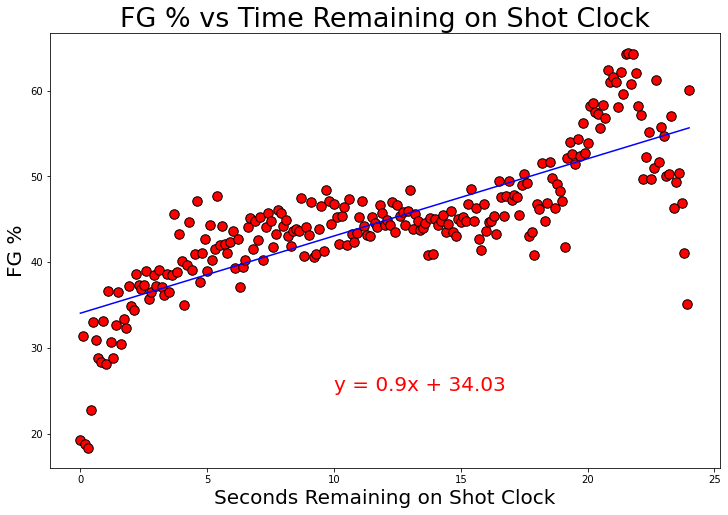

In [320]:
fig1, ax1 = plt.subplots(figsize=(12, 8))
# plt.scatter(graph_df["Shot Clock"], graph_df["FG%"], marker="o", s=90, c="r", edgecolor="k")

x_value = graph_df["Shot Clock"]
y_value = graph_df["FG%"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "b-")

# print equation in graph
plt.annotate(line_eq, (10,25), fontsize=20, color="r")


# add labels for readability
plt.title("FG % vs Time Remaining on Shot Clock", fontsize=27)
plt.xlabel("Seconds Remaining on Shot Clock", fontsize=20)
plt.ylabel("FG %", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.savefig("output_data/FG%1.png")

plt.show()

In [321]:
two_pointer = cleaned_df.loc[cleaned_df["PTS_TYPE"] <= 2]
three_pointer = cleaned_df.loc[cleaned_df["PTS_TYPE"] > 2]

In [322]:
two_pointer

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
2,21400899,W,24,3,1,0:00,NaN,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,W,24,6,2,8:15,9.1,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,L,-16,7,4,11:10,23.0,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [323]:
three_pointer

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
8,21400899,W,24,9,4,5:14,12.4,24.6,3,missed,"Morris, Darius",202721,7.3,0,0,brian roberts,203148
9,21400890,W,1,1,2,11:32,17.4,22.4,3,missed,"Ellington, Wayne",201961,19.8,0,0,brian roberts,203148
10,21400890,W,1,2,2,6:30,16.0,24.5,3,missed,"Lin, Jeremy",202391,4.7,0,0,brian roberts,203148
13,21400882,W,15,1,4,9:10,4.4,26.4,3,missed,"Green, Willie",2584,4.4,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128009,21400138,L,-10,4,3,0:40,16.0,25.9,3,missed,"McCollum, CJ",203468,1.8,0,0,jarrett jack,101127
128016,21400138,L,-10,11,4,0:34,21.1,23.0,3,missed,"Crabbe, Allen",203459,1.7,0,0,jarrett jack,101127
128031,21400116,L,-8,4,4,4:19,14.0,23.8,3,missed,"Thomas, Isaiah",202738,2.8,0,0,jarrett jack,101127
128057,21400033,W,12,2,2,10:02,7.3,22.1,3,missed,"Augustin, D.J.",201571,2.9,0,0,jarrett jack,101127


In [324]:
# find all the different timepoints
shot_clock_timepoints2 = two_pointer.groupby(["SHOT_CLOCK"])
shot_clock_remaining2 = shot_clock_timepoints2["SHOT_CLOCK"].unique()
# calculate number of shots at each timepoint
shot_clock_shots2 = shot_clock_timepoints2["SHOT_CLOCK"].count()
# calculate number of shots made at each timepoint
shots_made2 = shot_clock_timepoints2["FGM"].sum()
# calculate FG % at each timepoint
fg_percent2 = shots_made2 / shot_clock_shots2 * 100

# make a new dataframe for graphing
graph_df2 = pd.DataFrame({
    "FG Attempts": shot_clock_shots2,
    "FGs Made": shots_made2,
    "FG%": fg_percent2
})

# reset the index
graph_df2 = graph_df2.reset_index()
graph_df2 = graph_df2.rename(columns={"SHOT_CLOCK": "Shot Clock"})

graph_df2

,Shot Clock,FG Attempts,FGs Made,FG%
0,0.0,47,7,14.893617
1,0.1,48,16,33.333333
2,0.2,40,8,20.000000
3,0.3,48,8,16.666667
4,0.4,49,14,28.571429
...,...,...,...,...
236,23.6,138,72,52.173913
237,23.7,125,59,47.200000
238,23.8,108,43,39.814815
239,23.9,91,32,35.164835


The r-value is: 0.8007962979136098


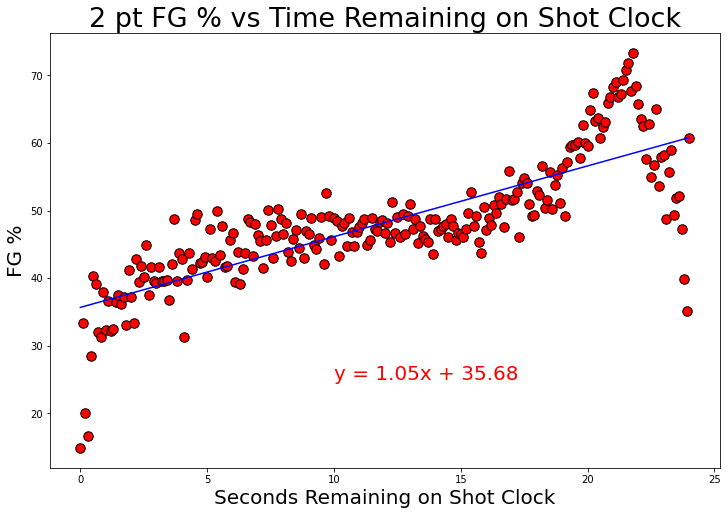

In [325]:
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = graph_df2["Shot Clock"]
y_value = graph_df2["FG%"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "b-")

# print equation in graph
plt.annotate(line_eq, (10,25), fontsize=20, color="r")

# add labels for readibility
plt.title("2 pt FG % vs Time Remaining on Shot Clock", fontsize=27)
plt.xlabel("Seconds Remaining on Shot Clock", fontsize=20)
plt.ylabel("FG %", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.savefig("output_data/FG%2.png")

plt.show()

In [326]:
# find all the different timepoints
shot_clock_timepoints3 = three_pointer.groupby(["SHOT_CLOCK"])
shot_clock_remaining3 = shot_clock_timepoints3["SHOT_CLOCK"].unique()
# calculate number of shots at each timepoint
shot_clock_shots3 = shot_clock_timepoints3["SHOT_CLOCK"].count()
# calculate number of shots made at each timepoint
shots_made3 = shot_clock_timepoints3["FGM"].sum()
# calculate FG % at each timepoint
fg_percent3 = shots_made3 / shot_clock_shots3 * 100

# make a new dataframe for graphing
graph_df3 = pd.DataFrame({
    "FG Attempts": shot_clock_shots3,
    "FGs Made": shots_made3,
    "FG%": fg_percent3
})

# reset the index
graph_df3 = graph_df3.reset_index()
graph_df3 = graph_df3.rename(columns={"SHOT_CLOCK": "Shot Clock"})

graph_df3

,Shot Clock,FG Attempts,FGs Made,FG%
0,0.0,31,8,25.806452
1,0.1,19,5,26.315789
2,0.2,24,4,16.666667
3,0.3,23,5,21.739130
4,0.4,39,6,15.384615
...,...,...,...,...
235,23.5,11,2,18.181818
236,23.6,9,2,22.222222
237,23.7,3,1,33.333333
238,23.8,4,3,75.000000


The r-value is: 0.34967756026933255


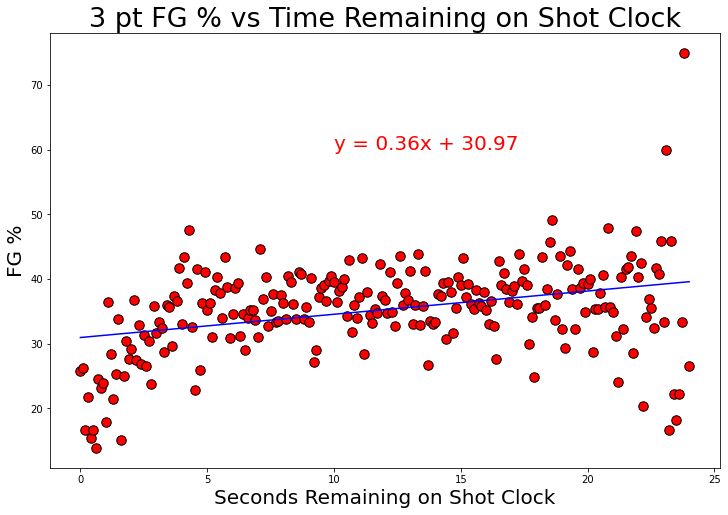

In [327]:
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = graph_df3["Shot Clock"]
y_value = graph_df3["FG%"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "b-")

# print equation in graph
plt.annotate(line_eq, (10,60), fontsize=20, color="r")

# add labels for readibility
plt.title("3 pt FG % vs Time Remaining on Shot Clock", fontsize=27)
plt.xlabel("Seconds Remaining on Shot Clock", fontsize=20)
plt.ylabel("FG %", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.savefig("output_data/FG%3.png")

plt.show()

In [328]:
# create bins and bin labels
bin_size = [0, 5, 10, 15, 20, 24]
bin_label_size = ["0-5", "6-10", "11-15", "16-20", "21-24"]

# create index
graph_df["Shot Clock"] = pd.cut(graph_df["Shot Clock"], bin_size, labels=bin_label_size)

# group dataframe by bins
shot_clock_binning = graph_df.groupby(["Shot Clock"])

# create value(s) for dataframe
fg_percentage = shot_clock_binning["FG%"].mean()

# create dataframe
bin_df = pd.DataFrame({"Overall FG %": fg_percentage})

# format cell for cleaner look
bin_df["Overall FG %"] = bin_df["Overall FG %"].map("{:.2f}".format)

bin_df

,Overall FG %
Shot Clock,
0-5,35.57
6-10,43.40
11-15,44.61
16-20,47.64
21-24,55.67
